In [66]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from surprise import *
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split


In [32]:
# import dataset
user_profile = pd.read_csv("data/user_profile/PEO_TV_Usage_Categorical_Non_Unique.csv")
user_profile

,Unnamed: 0,Phone_Number.hash,Peo_TV_Package,usage_08_20 (hh:mm),usage_07_20 (hh:mm),usage_06_20 (hh:mm),usage_05_20 (hh:mm),usage04_20 (hh:mm),usage_03_20 (hh:mm),usage_02_20 (hh:mm),usage_01_20 (hh:mm),,Usage_Rating_Scaled,Usage_Rating_Categorical
0,0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
1,1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.75,1.00,1.00,1.00,1.00,1.00,0.75,1.00,,0.93750,HIGH
2,2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
3,3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.25,0.25,0.25,0.50,0.75,0.75,0.25,0.25,,0.40625,MEDIUM
4,4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75,0.75,0.75,0.75,0.75,0.75,0.75,0.75,,0.75000,HIGH
2589,2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH
2590,2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.75,0.75,0.75,0.75,1.00,0.75,0.75,0.75,,0.78125,HIGH
2591,2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.75,,0.15625,LOW


In [33]:
user_profile.columns

Index(['Unnamed: 0', 'Phone_Number.hash', 'Peo_TV_Package',
       'usage_08_20 (hh:mm)', 'usage_07_20 (hh:mm)', 'usage_06_20 (hh:mm)',
       'usage_05_20 (hh:mm)', 'usage04_20 (hh:mm)', 'usage_03_20 (hh:mm)',
       'usage_02_20 (hh:mm)', 'usage_01_20 (hh:mm)', ' ',
       'Usage_Rating_Scaled', 'Usage_Rating_Categorical'],
      dtype='object')

In [34]:
data=user_profile.iloc[:,[1,2,12]]
data

,Phone_Number.hash,Peo_TV_Package,Usage_Rating_Scaled
0,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.93750
1,46960b77dad950ddae76dd53bd7848cd,PEO_UTHAYAM,0.93750
2,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.40625
3,71d08664b609dcaddf02d6ffc2532aa7,PEO_SILVER,0.40625
4,f98bd7d6c96317fc2656bc43441df8bb,PEO_SILVER,0.75000
...,...,...,...
2588,5fc30724801d125e0048b486655723f6,PEO_SILVER,0.75000
2589,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.78125
2590,e034fe9b7cb567273a07edbad9946fde,PEO_SILVER_PLUS,0.78125
2591,2ab8436cc34b4f16de3c452300f975c3,PEO_SILVER,0.15625


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2593 entries, 0 to 2592
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Phone_Number.hash    2593 non-null   object 
 1   Peo_TV_Package       2593 non-null   object 
 2   Usage_Rating_Scaled  2593 non-null   float64
dtypes: float64(1), object(2)
memory usage: 60.9+ KB


In [36]:
# total number of unique users
data['Phone_Number.hash'].nunique()


1428

In [37]:
# total number of unique peo tv package
data['Peo_TV_Package'].nunique()


22

## Interaction Matrix

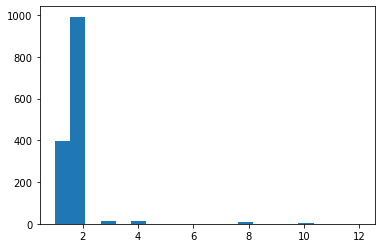

In [38]:
# create a histogram of all the interactions by all the users present in the dataset
interactions = data.groupby('Phone_Number.hash').count()['Peo_TV_Package']
plt.hist(interactions,bins=20)
plt.show()

In [39]:
# create the user item matrix using the ratings dataset - Hint: try using pivot function 
interactions_metrix = data.pivot_table(index="Phone_Number.hash", columns="Peo_TV_Package", values="Usage_Rating_Scaled")

In [40]:
interactions_metrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1428 entries, 00567a4a3c474aca1ce5cd6570648932 to fff2221d1365d22d2d08285f2b9fd303
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BOC                          5 non-null      float64
 1   DOUBLEPROMO                  2 non-null      float64
 2   LEISURE_SPORTS               1 non-null      float64
 3   LOTUS                        2 non-null      float64
 4   NEW_SLT_STAFF_PACKAGE        9 non-null      float64
 5   NEW_YEAR_TREAT               6 non-null      float64
 6   PEO_ENTERTAINMENT            18 non-null     float64
 7   PEO_FAMILY                   1 non-null      float64
 8   PEO_GOLD                     6 non-null      float64
 9   PEO_PLATINUM                 4 non-null      float64
 10  PEO_RELIGIOUS_PACKAGE        4 non-null      float64
 11  PEO_SILVER                   995 non-null    float64
 12  PEO_SILVER_FTTH       

In [41]:
# replace all the missing values with zero
interactions_metrix = interactions_metrix.fillna(0)

In [42]:
interactions_metrix.sample(n=10)

Peo_TV_Package,BOC,DOUBLEPROMO,LEISURE_SPORTS,LOTUS,NEW_SLT_STAFF_PACKAGE,NEW_YEAR_TREAT,PEO_ENTERTAINMENT,PEO_FAMILY,PEO_GOLD,PEO_PLATINUM,...,PEO_SILVER_FTTH,PEO_SILVER_PLUS,PEO_SILVER_PLUS_FTTH,PEO_TITANIUM,PEO_UNNATHAM,PEO_UTHAYAM,PRANAMA,SLTStaff_PEO_SILVER,SLT_STAFF_PEO_UNNATHAM_FTTH,SLT_STAFF_TRIPLE_PLAY
Phone_Number.hash,,,,,,,,,,,,,,,,,,,,,
38fa17c37f34b7c3cbab423c31f21c13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0
1d6f0ffdce6d98064083dcd7b2d4db13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0
bf970282eba794f1fd3b59a5e281b1f6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0
f39f7435a778b27d02b33993523a55b5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.1875,0.0,0.0,0.0
c65ea87b700d2801e7adcfaea90cc228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0
6de165518de641dbd2036b88f62084c5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0
b043714c955e2839cf3270f89ba82420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0
36adba3ab3196ff055dc0cb66d3fc03d,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0
157d80966d29d5f94629843c64622c1b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0000,0.0,0.0,0.0


In [58]:
reader = Reader(rating_scale=(0, 1))
data_model = Dataset.load_from_df(data, reader)

In [59]:
trainset, testset = train_test_split(data_model, test_size=.20)

## Collabarative Recoomenders with Suprise

### SVD recommender

In [68]:
# We'll use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results
validate = cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3146  0.3284  0.3238  0.3249  0.3230  0.3229  0.0045  
MAE (testset)     0.2746  0.2860  0.2863  0.2881  0.2803  0.2831  0.0050  
Fit time          0.16    0.14    0.14    0.13    0.14    0.14    0.01    
Test time         0.01    0.00    0.00    0.00    0.01    0.01    0.00    


In [69]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)
predictions

[Prediction(uid='321c06500f5d275d5f97846115492b78', iid='PEO_SILVER', r_ui=0.875, est=0.463371106951646, details={'was_impossible': False}),
 Prediction(uid='31735dc2614fac9cca6bf020f2d7cba5', iid='SLT_STAFF_TRIPLE_PLAY', r_ui=0.5625, est=0.5370208534233365, details={'was_impossible': False}),
 Prediction(uid='cc07dd6522e423bd147b9e6707fc20ab', iid='PRANAMA', r_ui=0.5625, est=0.6766820992728387, details={'was_impossible': False}),
 Prediction(uid='ab8e01b79df03b25a78f260f0c83a391', iid='PEO_SILVER', r_ui=0.0, est=0.463371106951646, details={'was_impossible': False}),
 Prediction(uid='149b28780639576b9799c53a216e81a3', iid='PEO_SILVER', r_ui=0.8125, est=0.4476706041045125, details={'was_impossible': False}),
 Prediction(uid='3cc8e646c3053630a33f22f2ed11309d', iid='PEO_SILVER_PLUS', r_ui=0.65625, est=0.6562656812962808, details={'was_impossible': False}),
 Prediction(uid='3ff964e1c7d3ad62aba6a032cdb80e64', iid='PEO_SILVER_PLUS', r_ui=0.9375, est=0.7896908838700528, details={'was_impossib

In [78]:
algo.predict("3cc8e646c3053630a33f22f2ed11309d","PEO_SILVER_PLUS")

Prediction(uid='3cc8e646c3053630a33f22f2ed11309d', iid='PEO_SILVER_PLUS', r_ui=None, est=0.6562656812962808, details={'was_impossible': False})

In [70]:
accuracy.rmse(predictions)

RMSE: 0.3068


0.3068085433377402

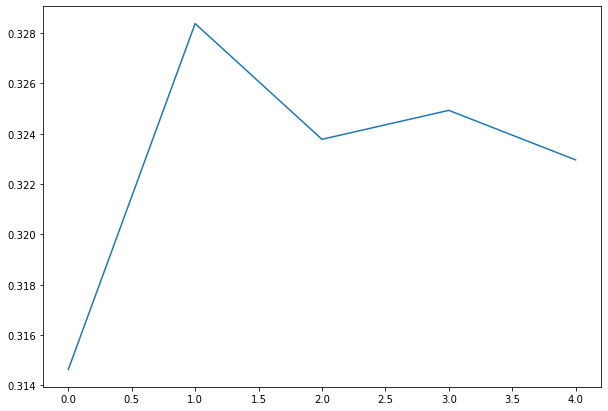

In [71]:
# RMSE
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(validate["test_rmse"])

### SlopeOne recommender

In [84]:
# We'll use the SlopeOne algorithm.
algo = SlopeOne()

# Run 5-fold cross-validation and print results
validate =cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2263  0.2132  0.2039  0.2323  0.2132  0.2178  0.0102  
MAE (testset)     0.1178  0.1047  0.0996  0.1197  0.1036  0.1091  0.0081  
Fit time          0.03    0.02    0.02    0.02    0.02    0.02    0.01    
Test time         0.01    0.00    0.01    0.00    0.00    0.01    0.00    


In [85]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)
predictions

[Prediction(uid='321c06500f5d275d5f97846115492b78', iid='PEO_SILVER', r_ui=0.875, est=0.5370208534233365, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='31735dc2614fac9cca6bf020f2d7cba5', iid='SLT_STAFF_TRIPLE_PLAY', r_ui=0.5625, est=0.5370208534233365, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='cc07dd6522e423bd147b9e6707fc20ab', iid='PRANAMA', r_ui=0.5625, est=0.5625, details={'was_impossible': False}),
 Prediction(uid='ab8e01b79df03b25a78f260f0c83a391', iid='PEO_SILVER', r_ui=0.0, est=0.5370208534233365, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='149b28780639576b9799c53a216e81a3', iid='PEO_SILVER', r_ui=0.8125, est=0.8125, details={'was_impossible': False}),
 Prediction(uid='3cc8e646c3053630a33f22f2ed11309d', iid='PEO_SILVER_PLUS', r_ui=0.65625, est=0.5370208534233365, details={'was_impossible': True, 'reason': 'User and/or item is unkno

In [86]:
accuracy.rmse(predictions)

RMSE: 0.2021


0.20209516606888278

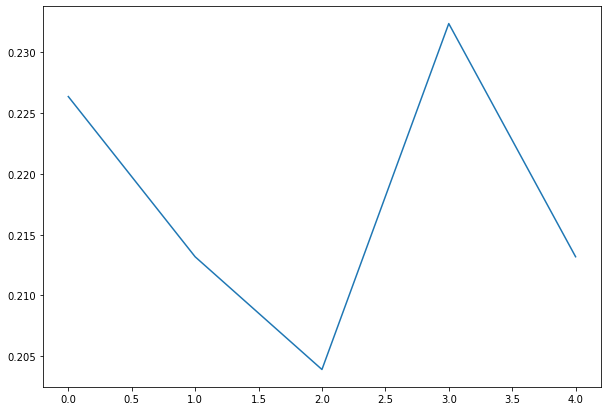

In [87]:
# RMSE
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(validate["test_rmse"])

### KNN with Means recommender

In [88]:
# We'll use the SlopeOne algorithm.
algo = KNNWithMeans()

# Run 5-fold cross-validation and print results
validate = cross_validate(algo, data_model, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.2322  0.1939  0.2212  0.2293  0.2165  0.2186  0.0136  
MAE (testset)     0.1217  0.0889  0.1119  0.1172  0.1028  0.1085  0.0117  
Fit time          0.17    0.13    0.14    0.18    0.10    0.14    0.03    
Test time         0.22    0.40    0.38    0.41    0.34    0.35    0.07    


In [89]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)
predictions

Computing the msd similarity matrix...
Done computing similarity matrix.


[Prediction(uid='321c06500f5d275d5f97846115492b78', iid='PEO_SILVER', r_ui=0.875, est=0.5370208534233365, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='31735dc2614fac9cca6bf020f2d7cba5', iid='SLT_STAFF_TRIPLE_PLAY', r_ui=0.5625, est=0.5370208534233365, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='cc07dd6522e423bd147b9e6707fc20ab', iid='PRANAMA', r_ui=0.5625, est=0.5625, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='ab8e01b79df03b25a78f260f0c83a391', iid='PEO_SILVER', r_ui=0.0, est=0.5370208534233365, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='149b28780639576b9799c53a216e81a3', iid='PEO_SILVER', r_ui=0.8125, est=0.8125, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='3cc8e646c3053630a33f22f2ed11309d', iid='PEO_SILVER_PLUS', r_ui=0.65625, est=0.5370208534233365, details={'was_impossible': True, 'rea

In [95]:
algo.predict("d7f6eeaa2c916f27c885502ea094cb3b","PEO_SILVER")

Prediction(uid='d7f6eeaa2c916f27c885502ea094cb3b', iid='PEO_SILVER', r_ui=None, est=0.75, details={'actual_k': 0, 'was_impossible': False})

In [90]:
accuracy.rmse(predictions)

RMSE: 0.2021


0.20209516606888278

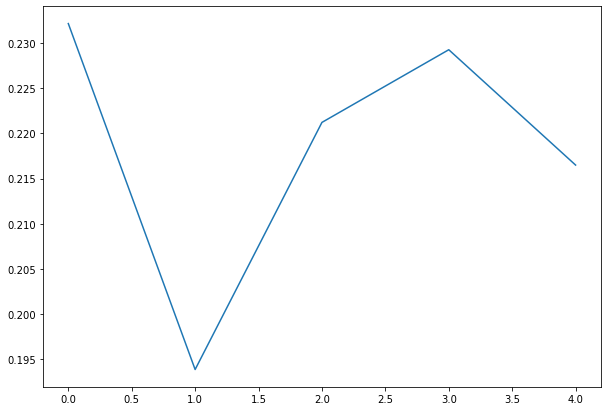

In [91]:
# RMSE
fig,ax = plt.subplots(figsize=(10,7))
ax.plot(validate["test_rmse"])

### Benchmark algorithms

In [47]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SlopeOne(), KNNBaseline(), KNNWithMeans(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data_model, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')    

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


,test_rmse,fit_time,test_time
Algorithm,,,
KNNWithMeans,0.244577,0.080671,0.505140
SlopeOne,0.246626,0.020619,0.008900
KNNBaseline,0.262403,0.085773,0.434478
SVD,0.327707,0.109378,0.005218
BaselineOnly,0.347829,0.005750,0.003702
CoClustering,0.513257,0.130410,0.004118
